### *Performing Explanatory Description Analysis (EDA) for the Customer's Churn Dataset*

                                                  The Problem

Ahead of the meeting of stakeholders, the senior data scientist has assigned the task of digging deep into the data below and come up with a 10-15 slides deck of Explanatory Description Analysis (EDA) for the data.

                                                  The Objective

The EDA should be aimed at;
1.   Digging deep to unravel gold in form of insights.
2.   Show Trends and any other information that may be or may not be visible 


### *What does Churn Means?*

Churn in business terms refers to as ‘when a client ends a subscription to a service they have been using.’ An example in context of this project will be when people that subscribes to a particular network plans cancels subscription. Another common example is cancelling Spotify/Netflix subscriptions. 

So, basically, Churn Prediction is essentially predicting which clients are most likely to cancel a subscription i.e ‘leave a company’ based on their usage of the service.

From a company point of view, it is necessary to gain this information because acquiring new customers is often arduous and costlier than retaining old ones. Hence, the insights gained from Churn Prediction helps them to focus more on the customers that are at a high risk of leaving.

In [1]:
# importing the required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
# loading the dataset
path = 'Customer Churn.csv'
churn_data = pd.read_csv(path)

churn_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,649.7820,122.1980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,235.0890,76.1210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,252.2880,78.0320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,969.8760,157.7640,0


In [18]:
# scanning through the data types
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

In [22]:
# a view of all the column
churn_data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'FN', 'FP', 'Churn'],
      dtype='object')

In [17]:
# knowing the  dimensions of the data frame
churn_data.shape

(3150, 16)

In [119]:
# overview of a dataset, gives the statistical breakdown of the data frame
churn_data.describe()

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_use,Frequency_of_SMS,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Age,Customer_Value,FN,FP,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [36]:
# checking for null values

churn_data.isnull().sum()

Call_Failure               0
Complains                  0
Subscription_Length        0
Charge_Amount              0
Seconds_of_Use             0
Frequency_of_use           0
Frequency_of_SMS           0
Distinct_Called_Numbers    0
Age_Group                  0
Tariff_Plan                0
Status                     0
Age                        0
Customer_Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

### *From the dataset, there is no missing data*

In [23]:
# searching through the index dataset 
churn_data.index

RangeIndex(start=0, stop=3150, step=1)

In [4]:
# renaming column
churn_data.columns = ['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount',
       'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_Sms',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status', 'Age',
       'Customer_Value', 'FN', 'FP', 'Churn']

churn_data.head()

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_Sms,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Age,Customer_Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [5]:
# removing some features from the dataset, by dropping the unimportant columns as it is not mentioned in the dataset information

churn_data.drop(['FN', 'FP', 'Age'], axis=1, inplace=True)
churn_data

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_Sms,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Customer_Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,1077.640,0


                                               Performing EDA

In [86]:
# checking through the Charge_Amount column to see what info we are interested in. we are only interested in 0 and 9 
churn_data.Charge_Amount.value_counts()

0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: Charge_Amount, dtype: int64

In [82]:
# ommitting the information from the Charge_Amount column that does not concern our analysis. 
#churn_data = churn_data.query('Charge_Amount == "0" "9"')

In [100]:
churn_data.Age_Group.value_counts()

3    1425
2    1037
4     395
5     170
1     123
Name: Age_Group, dtype: int64

In [95]:
#churn_data = churn_data.query('Age_Group == "1" "5"')

In [266]:
churn_data['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Distribution of Churn Customers')

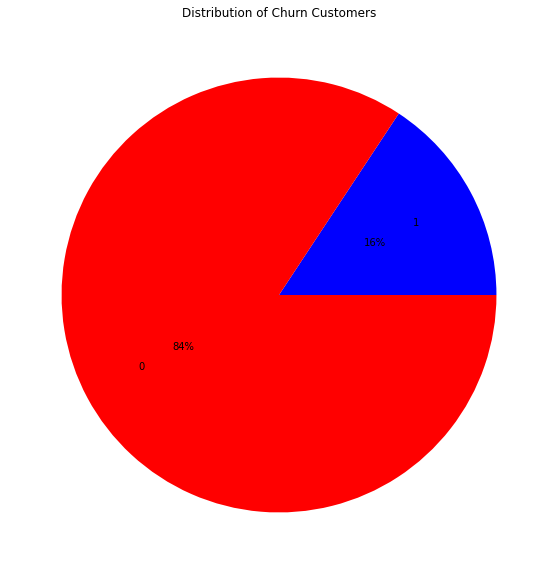

In [265]:
plt.figure(figsize=(10,10))
plt.pie(x=[495, 2655], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title('Distribution of Churn Customers')

                                                      Inference

### *From the plot above, where 1: churn, 0: non-churn. The probability of Churn is 16%, while the probability of non-Churn is 84%.* 
### *What this means is that, 84% of Customers will not Churn at the end of 12 months, while 16% of Customers will Churn at the end of 12 months.*

                                                   Correlation Matrix

<AxesSubplot:>

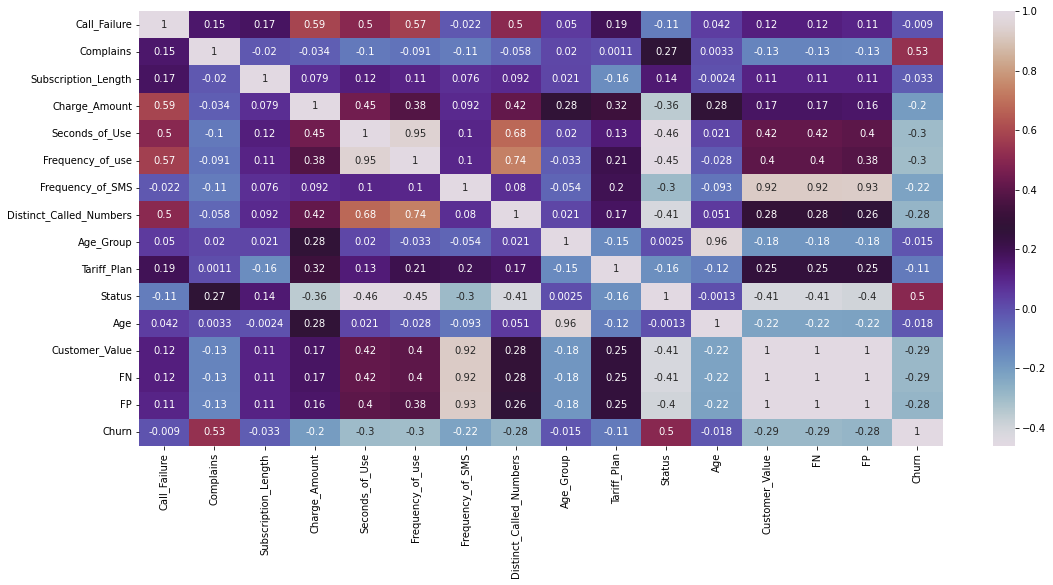

In [161]:
corr = churn_data.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot = True, cmap='twilight')

In [242]:
# creating  correlation matrix for the columns in the dataset and an empty set that will contain all the correlated features
correlated_features = set()
correlation_matrix = churn_data.corr()

In [243]:
# looping through all the columns in the correlation matrix.
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7: # adding the columns with a correlation value of 0.7 to the
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [244]:
# checking the total length of columns in our dataset
len(correlated_features)

6

In [245]:
# printing the names of the correlated features
print(correlated_features)

{'Distinct_Called_Numbers', 'Age', 'Frequency_of_use', 'Customer_Value', 'FP', 'FN'}


                                                       Inference

### *Correlation Matrix is important as it shows if two or more features are mutually correlated, if two or more features are correlated the it means they convey redundant information to the model and hence only one of the correlated features should be retained to reduce the number of features.*

### *From the correlation Matrix operation performed above, we can see that features that are correlated are; Distinct_Called_Numbers, Age, Frequency_of_use, Customer_Value, FP, FN. Although some features were initially dropped as it was not stated. However, it should be noted that this features are correlated and can affect the accuracy if not dropped. But since the objective however is to perform EDA, we might as well not perform the drop operation*

<AxesSubplot:>

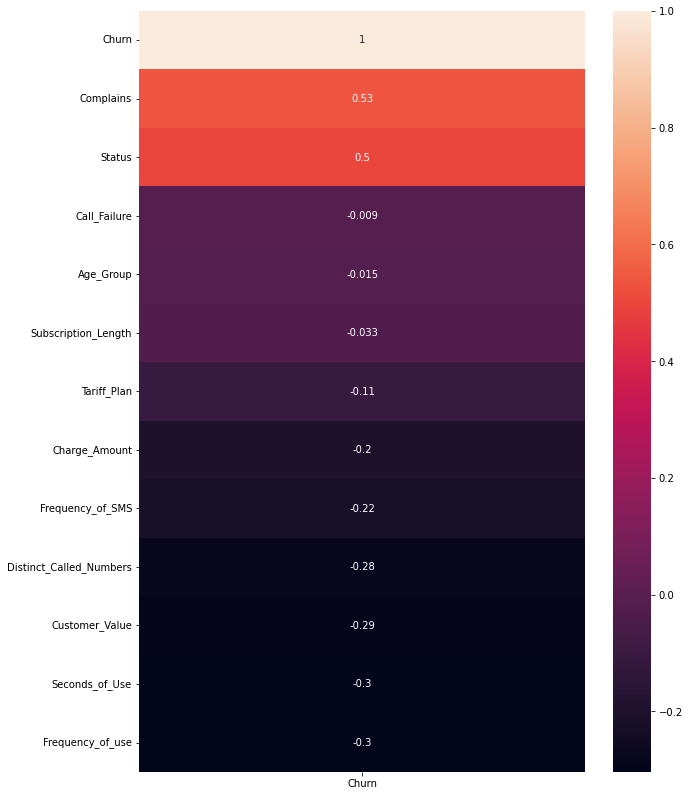

In [268]:
# getting the correlation values using Pearson's method and then visualize the correlations using Heatmap
fig, ax = plt.subplots(figsize=(10,14))
churn_data_corr = churn_data.corr()[['Churn']].sort_values(
  by='Churn', ascending=False)
sns.heatmap(churn_data_corr, annot=True, ax=ax)

                                                  Inference

### *From the above, Lighter colors in the map indicate higher positive correlation values and darker colors indicate lower positive correlation values and sometimes negative correlation values.*

### *Churn is highly and positively correlated with the Complains variable, the Complains variable describes the Complains made by customers. We can also see a positive and high correlation with Status which specifies how active or not a customer is.*

### *What this mean is that the correlated features are highly significant in explaining if customers will churn or not.*



In [246]:
# dropping correlated features
churn_data.drop(labels=correlated_features, axis=1, inplace=True)

In [247]:
churn_data

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_SMS,Age_Group,Tariff_Plan,Status,Churn
0,8,0,38,0,4370,5,3,1,1,0
1,0,0,39,0,318,7,2,1,2,0
2,10,0,37,0,2453,359,3,1,1,0
3,10,0,38,0,4198,1,1,1,1,0
4,3,0,38,0,2393,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,92,2,2,1,0
3146,17,0,17,1,9237,80,5,1,1,0
3147,13,0,18,4,3157,38,3,1,1,0
3148,7,0,11,2,4695,222,3,1,1,0


[Text(0.5, 0, 'Status'), Text(0, 0.5, 'Frequency of Status')]

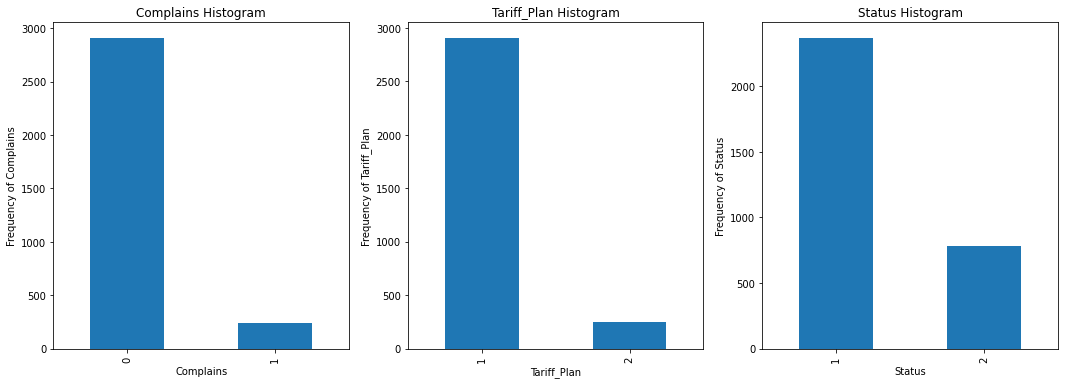

In [158]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt1 = churn_data.Complains.value_counts().plot(kind='bar')
plt.title('Complains Histogram')
plt1.set(xlabel = 'Complains', ylabel='Frequency of Complains')

plt.subplot(1,3,2)
plt1 = churn_data.Tariff_Plan.value_counts().plot(kind='bar')
plt.title('Tariff_Plan Histogram')
plt1.set(xlabel = 'Tariff_Plan', ylabel='Frequency of Tariff_Plan')

plt.subplot(1,3,3)
plt1 = churn_data.Status.value_counts().plot(kind='bar')
plt.title('Status Histogram')
plt1.set(xlabel = 'Status', ylabel='Frequency of Status')

([], [])

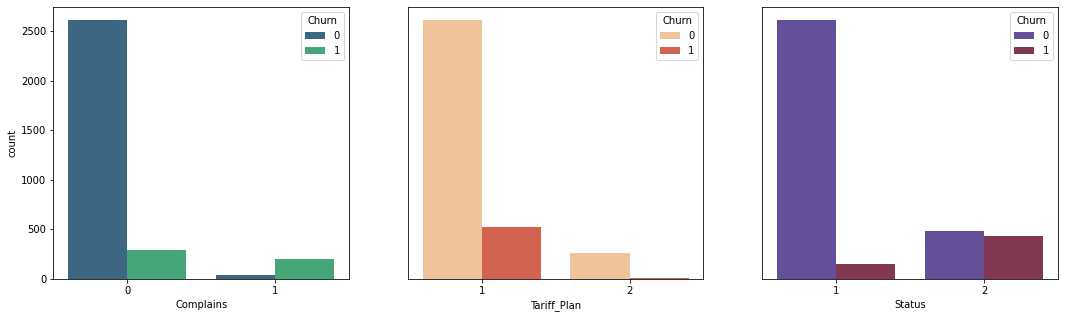

In [157]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(x='Complains' ,hue='Churn', data=churn_data,palette='viridis')

plt.subplot(1,3,2)
sns.countplot(x='Tariff_Plan',hue='Churn',data=churn_data,palette='OrRd')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(1,3,3)
sns.countplot(x='Status',hue='Churn',data=churn_data,palette='twilight')
plt.ylabel(' ')
plt.yticks([ ])

                                                  Inference

### *From the Complains plot, where 0: No complaint, 1: complain, the number of people who did not complain is more than those who did. What this means is that the numbers of people who churned is determined by the complains made, as people who churned complained more.*


### *From the Tariff Plan plot, where 1: Pay as you go, 2: contractual, it is reveled that customers who are on the Pay as you go Tariff Plan are more likely to churn than those on the Contractual Tariff Plan which are more likely not to Churn.*


### *From the Status plot, where 1: active, 2: non-active, it is reveled that customers who have an active Status are more than those who are non-active. What this means is that, as customers becomes non-active they are likely to churn than customers who are active.*

[Text(0.5, 0, 'Subscription Length In Weeks'), Text(0, 0.5, 'Count')]

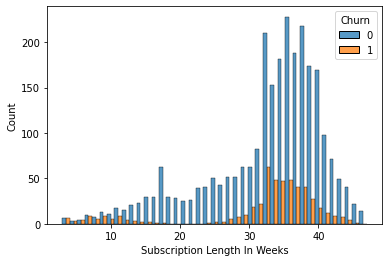

In [139]:
ax = sns.histplot(x = 'Subscription_Length', hue = 'Churn', data = churn_data, multiple='dodge')
ax.set(xlabel="Subscription Length In Weeks", ylabel = "Count")

                                                        Inference

### *From the plot, where Subscription Length represents total number of subscription. It shows that the customers subsciption length increases.*
### *What this means is that, as Customers begin to increase their length of subsciption,  the rate of churn reduces. This means customers with higher subsciption Length are less likely to Churn.*

In [127]:
churn_data.Customer_Value.describe()

count    3150.000000
mean      470.972916
std       517.015433
min         0.000000
25%       113.801250
50%       228.480000
75%       788.388750
max      2165.280000
Name: Customer_Value, dtype: float64

[Text(0.5, 0, 'Customer Value In Hours'), Text(0, 0.5, 'Count')]

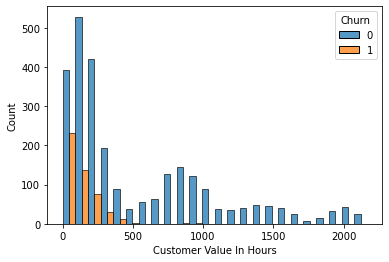

In [17]:
ax = sns.histplot(x = 'Customer_Value', hue = 'Churn', data = churn_data, multiple='dodge')
ax.set(xlabel="Customer Value In Hours", ylabel = "Count")

                                                     Inference

### *As the Value of Customers increases, the probability of customers churn decreases.*
### *This means that as customers get more value they are likely not to churn.*

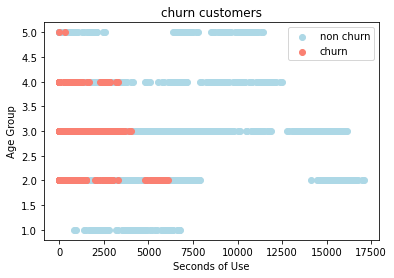

<Figure size 1800x720 with 0 Axes>

In [32]:
plt.scatter(churn_data.Seconds_of_Use[churn_data.Churn==0],churn_data.Age_Group[churn_data.Churn==0], c='lightblue') ##non churn customers
plt.scatter(churn_data.Seconds_of_Use[churn_data.Churn==1],churn_data.Age_Group[churn_data.Churn==1], c='salmon') #churn customers
plt.title('churn customers')
plt.ylabel('Age Group')
plt.xlabel('Seconds of Use')
plt.legend(['non churn','churn'])
plt.figure(figsize=(25,10))
plt.show()

                                                  Inference

### *where status 1: active, 2: non-active. It shows that, people who are active also have a higher Subscription lenght are less likely to churn than those who are non active.*

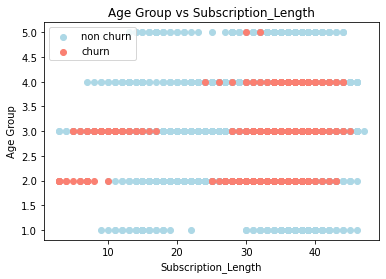

<Figure size 1800x720 with 0 Axes>

In [33]:
plt.scatter(churn_data.Subscription_Length[churn_data.Churn==0],churn_data.Age_Group[churn_data.Churn==0], c='lightblue') #non churn customers
plt.scatter(churn_data.Subscription_Length[churn_data.Churn==1],churn_data.Age_Group[churn_data.Churn==1], c='salmon') #churn customers
plt.title('Age Group vs Subscription_Length')
plt.ylabel('Age Group')
plt.xlabel('Subscription_Length')
plt.legend(['non churn','churn'])
plt.figure(figsize=(25,10))
plt.show()

                                                   Inference

### *The younger age group have a higher Subscription Length than the older age group. This means that the younger age group are less likely to churn* 

In [62]:
# grouping the rows based on the values in the Age Group column which are younger and older
churn_data[['Age_Group','Churn']].groupby('Age_Group').agg(['mean','count'])

Churn      
               mean count
Age_Group                
1          0.000000   123
2          0.177435  1037
3          0.161404  1425
4          0.200000   395
5          0.011765   170

### *From the Age Group, where 1 = younger age, 5 = older age. The number of older older age are close so there is not a considerable imbalance. On average, the churn rate for the older age is higher than that of the younger age.*

In [39]:
# group by multiple columns by passing a list of columns to groupby function
churn_data[['Age_Group','Subscription_Length', 'Seconds_of_Use', 'Churn']].groupby('Age_Group').mean()

,Subscription_Length,Seconds_of_Use,Churn
Age_Group,,,
1,32.056911,3986.853659,0.000000
2,31.847637,4536.344262,0.177435
3,33.348772,4463.154386,0.161404
4,31.483544,4042.088608,0.200000
5,32.823529,5512.094118,0.011765


                                             Inference

### *The Subscription_Length and the Total seconds of calls is more from the younger Age Group than the Older Age Group, Hence, the younger age group are less likely to churn.*

In [42]:
churn_data[['Status','Subscription_Length', 'Seconds_of_Use', 'Charge_Amount', 'Churn']].groupby('Status').mean()


,Subscription_Length,Seconds_of_Use,Charge_Amount,Churn
Status,,,,
1,31.838260,5583.468750,1.254223,0.052787
2,34.672634,1108.176471,0.000000,0.473146


                                                 Inference

### *where Status represents 1: active and  2: non-active. This implies that the active customers are the ones who spend more time on calls and are also charged higher, yet are less likely to churn compared to the non active customers.*

In [82]:
churn_data[['Charge_Amount', 'Seconds_of_Use']].groupby(['Charge_Amount']).agg(['mean','max'])

Seconds_of_Use       
                        mean    max
Charge_Amount                      
0                3022.313348  15890
1                5135.098865  16195
2                5934.174684  16500
3                7532.462312  16480
4                9617.052632  16785
5               10713.300000  17090
6               10367.545455  16980
7               10173.928571  10435
8               10435.000000  10840
9               10696.071429  11145
10              10957.142857  11450

                                                Inference

### *Where Charge Amount represents charges on customers service from the lowest amount to the highest amount. What this means is that, As customers are Charged higher, the total seconds of calls reduces, that is, they try to reduce the total time (seconds) on calls. However, customers charged lower amount have higer probability of staying longer on calls.*

In [97]:
churn_data.groupby(by='Complains').mean()

,Call_Failure,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_Sms,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Customer_Value,Churn
Complains,,,,,,,,,,,,
0,7.308353,32.591956,0.957717,4599.251289,70.960468,76.780681,23.798212,2.820901,1.077690,1.214507,490.746296,0.101409
1,11.485477,31.937759,0.763485,2942.016598,51.356846,29.651452,20.029046,2.887967,1.078838,1.655602,232.297552,0.829876


                                                 Inference

### *Making inference from the Complains feature, where 0 represents No complaint from customers and 1 represents complaint by customers shows that cutomers with no complains experince little  Call Failure, have higher Subscription Length, and are better off with low probabilty to churn than customers with complains. This means that cutomers who complains have higher probability to churn.*

                                              Recommendations

1. since the Complains and Status features are highly significant in explaining if a customer will churn or not, the company should give it more attention, because acquiring new customers is often arduous and costlier than retaining old ones. Hence, emphasis should be laid on the customers that are at a high risk of leaving and incentive should be given.*

2. Since the Tariff Plan plot,  it is revels that customers who are on the Pay as you go Tariff Plan are more likely to churn than those on the Contractual Tariff Plan. Hence, more attention should be given to those on the  Pay as you go Tariff plan aa well as  incentives that attract customers to join the Contractual Tariff Plan.

3. Since the subscription length plot shows that the customers subsciption length increases, Incentives should be given to Customers with consistent subscription length and also to customers  emphasis should be given to customers with lower subscription length to reduce the rate of churn.

4. Since the Value of Customers plot shows that as customers get value the probability of customers churn decreases. Emphasis should be laid on the value of service as this means customers that they are likely not to churn.

5. Since the inference from the Age Group shows that the number of older age group are more likely to churn, attention should be directed to avoid churn.
